In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_excel('/content/density17.xlsx')

In [3]:
df

,x1,d (g cm-3),VE (cm3 mol-1)
0,0.0120,NaN,NaN
1,0.0310,NaN,NaN
2,0.0500,0.76472,−0.250
3,0.1000,0.78491,−0.502
4,0.1500,0.80339,−0.696
5,0.2002,0.82058,−0.847
6,0.2501,0.83617,−0.948
7,0.2974,0.85000,−1.021
8,0.3502,0.86435,−1.072
9,0.4001,0.87660,−1.076


NaNs in dataset before handling: x1                0
T                 0
VE_(cm3_mol-1)    2
d_(g_cm-3)        2
dtype: int64
NaNs in dataset after handling: x1                0
T                 0
VE_(cm3_mol-1)    0
d_(g_cm-3)        0
dtype: int64
NaNs in X_scaled: 0
NaNs in y_scaled: 0
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.8768 - val_loss: 1.3221
Epoch 2/200
1/1 [==============================] - 0s 66ms/step - loss: 0.8408 - val_loss: 1.3614
Epoch 3/200
1/1 [==============================] - 0s 155ms/step - loss: 0.7978 - val_loss: 1.3937
Epoch 4/200
1/1 [==============================] - 0s 97ms/step - loss: 0.7496 - val_loss: 1.4488
Epoch 5/200
1/1 [==============================] - 0s 53ms/step - loss: 0.7022 - val_loss: 1.5086
Epoch 6/200
1/1 [==============================] - 0s 141ms/step - loss: 0.6645 - val_loss: 1.5546
Epoch 7/200
1/1 [==============================] - 0s 78ms/step - loss: 0.6382 - val_loss: 1.5824
Epoch 8/200
1/1 [======

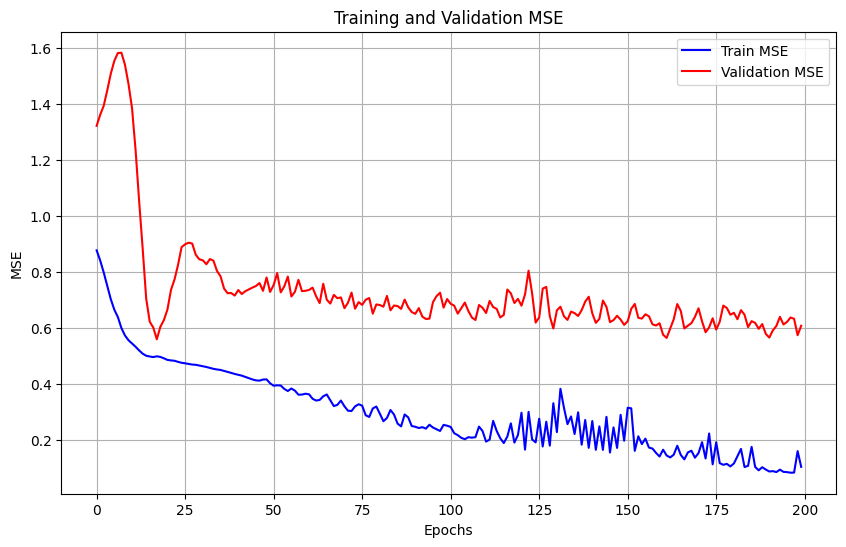

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the necessary data
# Adding constant temperature T as a feature
df['T'] = 343.15

# Rename columns to remove special characters and spaces
df['VE_(cm3_mol-1)'] = df['VE (cm3 mol-1)'].str.replace('−', '-')
df['VE_(cm3_mol-1)'] = df['VE_(cm3_mol-1)'].astype(float)
df['d_(g_cm-3)'] = df['d (g cm-3)']

# Drop original columns with special characters and spaces
df = df.drop(['VE (cm3 mol-1)', 'd (g cm-3)'], axis=1)

# Check for NaNs in the dataset
print("NaNs in dataset before handling:", df.isna().sum())

# Handle NaNs by filling with the mean of the column
df.fillna(df.mean(), inplace=True)

# Verify there are no NaNs after handling
print("NaNs in dataset after handling:", df.isna().sum())

# Proceed with the rest of the steps

# Input features and target variables
X = df[['x1', 'T']].values
y = df[['d_(g_cm-3)', 'VE_(cm3_mol-1)']].values

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Check for NaNs in the data
print("NaNs in X_scaled:", np.isnan(X_scaled).sum())
print("NaNs in y_scaled:", np.isnan(y_scaled).sum())

# Build the ANN model with more layers and regularization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model with more layers
model = Sequential()
model.add(Dense(64, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(8, activation='relu'))   # Additional hidden layer
model.add(Dense(2))  # Output layer for two target variables

# Custom RMSE loss function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Compile the model with mean squared error loss function and lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=rmse)

# Train the model
history = model.fit(X_scaled, y_scaled, epochs=200, batch_size=64, validation_split=0.2)

# Predict and inverse transform the results
y_pred_scaled = model.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_original = scaler_y.inverse_transform(y_scaled)

# Calculate the error percentage (MAPE) for each target variable separately
mape_density = np.mean(np.abs((y_original[:, 0] - y_pred[:, 0]) / y_original[:, 0])) * 100
mape_ve = np.mean(np.abs((y_original[:, 1] - y_pred[:, 1]) / y_original[:, 1])) * 100

print(f"Mean Absolute Percentage Error (MAPE) for Density: {mape_density:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE) for VE: {mape_ve:.2f}%")

# Prepare a comparison DataFrame
comparison = pd.DataFrame({
    'x1': X[:, 0],
    'T': X[:, 1],
    'd_actual': y_original[:, 0],
    'd_predicted': y_pred[:, 0],
    'VE_actual': y_original[:, 1],
    'VE_predicted': y_pred[:, 1],
})

# Display the comparison table
print(comparison.to_string(index=False))

# Save the comparison DataFrame to an Excel file
comparison.to_excel('comparison_results.xlsx', index=False)

print("Comparison results saved to 'comparison_results.xlsx'")

# Plotting the loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train MSE', color='blue')
plt.plot(history.history['val_loss'], label='Validation MSE', color='red')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()
plt.grid(True)
plt.show()


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Adding constant temperature T as a feature
df['T'] = 283.15


# Input features and target variables
X = df[['x1', 'T']].values
y = df[['d_(g_cm-3)', 'VE_(cm3_mol-1)']].values

# Standardize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Build the ANN model with more layers
model = Sequential()
model.add(Dense(64, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))  # Additional hidden layer
model.add(Dense(8, activation='relu'))   # Additional hidden layer
model.add(Dense(2))  # Output layer for two target variables

# Custom RMSE loss function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Compile the model with a different optimizer and increased learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=rmse)

# Train the model
history = model.fit(X_scaled, y_scaled, epochs=500, batch_size=16, validation_split=0.2)

# Predict and inverse transform the results
y_pred_scaled = model.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_original = scaler_y.inverse_transform(y_scaled)

# Calculate the error percentage (MAPE) for each target variable separately
mape_density = np.mean(np.abs((y_original[:, 0] - y_pred[:, 0]) / y_original[:, 0])) * 100
mape_ve = np.mean(np.abs((y_original[:, 1] - y_pred[:, 1]) / y_original[:, 1])) * 100

print(f"Mean Absolute Percentage Error (MAPE) for Density: {mape_density:.2f}%")
print(f"Mean Absolute Percentage Error (MAPE) for VE: {mape_ve:.2f}%")

# Prepare a comparison DataFrame
comparison = pd.DataFrame({
    'x1': X[:, 0],
    'T': X[:, 1],
    'd_actual': y_original[:, 0],
    'd_predicted': y_pred[:, 0],
    'VE_actual': y_original[:, 1],
    'VE_predicted': y_pred[:, 1],
})

# Save the comparison DataFrame to an Excel file
comparison.to_excel('comparison_results.xlsx', index=False)

print("Comparison results saved to 'comparison_results.xlsx'")

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train RMSE', color='blue')
plt.plot(history.history['val_loss'], label='Validation RMSE', color='red')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
plt.grid(True)
plt.show()